# Getting Started - Modelo de Regresión Lineal

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [112]:
# Definir la ruta donde se encuentra la carpeta y los CSVs que iremos trabajar
ruta_datos_preprocesados = '../data/ficheros_procesados/datos_preprocesados_limpios.csv'
# ruta_datos_preprocesados = '../data/ficheros_procesados/datos_preprocesados.csv'

#ruta_datos_preprocesados = '../data/2019.csv'

# Creación del DataFrame
data = pd.read_csv(ruta_datos_preprocesados, delimiter=",", engine="python")
data.head()

,ANO,PAIS,REGION,FELICIDAD_SCORE,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,2015,Islandia,Europa Occidental,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,2015,Dinamarca,Europa Occidental,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
2,2015,Noruega,Europa Occidental,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
3,2015,Finlandia,Europa Occidental,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
4,2015,Suecia,Europa Occidental,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262


Analisando nuestro conjuto de datos, vemos que la mayor parte de las columnas son numericas con excepción de Pais y Region. Para nuestro proyecto de predicción del nivel de felicidad no necesitamos de estas dos columnas.

Notamos que como la mayor parte de los datos son numéricos no hay que hacer mucho tratamiento para usarlos, lo podremos usar directamente en nuestro modelo.

Otra cosa que notamos es que solo tiene 156 filas (me refiero a la base original), por lo que un modelo simple debería funcionar bien.

En lugar de 9 columnas, es realmente lo que nos importa, tiene relativamente pocas caracterísiticas, por lo que un modelo simple debería funcionar bien. 

Y nuestro "Overall rank" (rango) aquí, en realidad, no nos brinda ninguna información útil porque "Score" es básicamente el rango correcto. Si el puntaje (Score) es alto el "Overall rank" (rango) es bajo, si el puntaje (Score) es bajo el "Overall rank"(rango) es alto. El "Overal rank" (rango) es solo un orden de los puntajes, por lo que el rango (Overall rank) y el país ("Country or regions") pueden eliminarse del conjunto de datos (dataset). 

In [113]:
data.columns

Index(['ANO', 'PAIS', 'REGION', 'FELICIDAD_SCORE', 'ECONOMIA_PIB_PER_CAPITA',
       'APOYO_SOCIAL', 'SALUD_ESPERANZA_DE_VIDA', 'LIBERTAD',
       'PERCEPCION_CORRUPCION', 'GENEROSIDAD'],
      dtype='object')

In [114]:
# data.drop(['PAIS', 'REGION'], axis=1, inplace=True)

data.drop(['ANO', 'PAIS', 'REGION'], axis=1, inplace=True)
# data.drop(['Overall rank', 'Country or region'], axis=1, inplace=True)
data.head()

,FELICIDAD_SCORE,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
2,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
3,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
4,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262


# Visualization

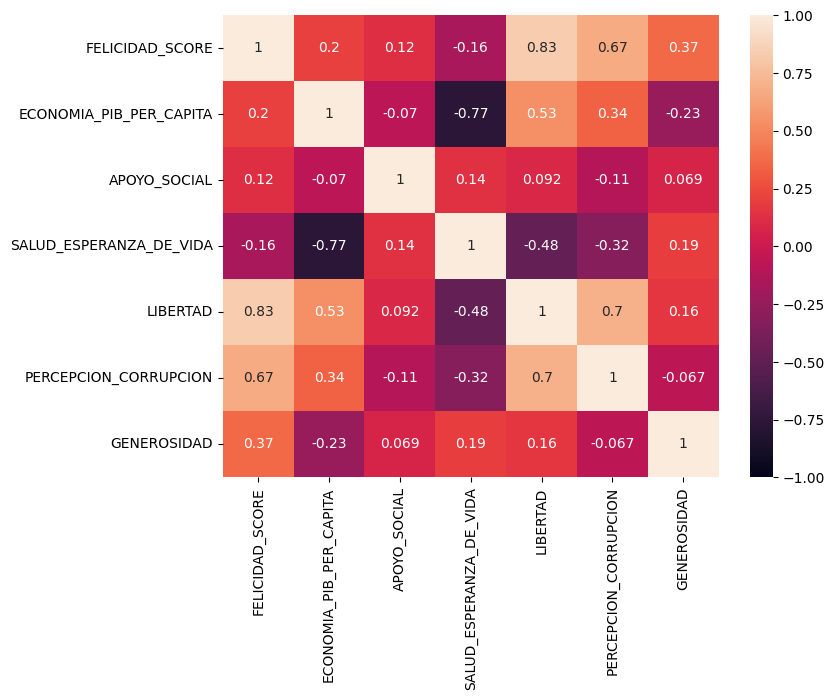

In [115]:
# Gráfica de todos los valores contendidos en el conjunto de datos importados a este cuaderno
# Esta gráfica no separa los países nórdicos de España, nos permite observar la situación global de estos países
# en relación a las a variables llevando en consideranción el período de 2015-2023.
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

Análisis Mapa de Calor:

El conjunto de datos analisado en el mapa de calor abrange todos los datos de 2015-2023 de todos los países nórdicos y España. Las correlaciones observadas en este  conjunto de datos son_

- ECONOMIA_PIB_PER_CAPITA -> LIBERTAD (fuerte correlación)
- PERCEPCION_CORRUPCION -> LIBERTAD (fuerte correlación)
- LIBERTAD -> APOYO_SOCIAL (Hay correlación pero poca)
- GENEROSIDAD -> LIBERTAD (Hay correlación pero poca)
- GENEROSIDAD -> APOYO_SOCIAL (Hay correlación pero poca)
- GENEROSIDAD -> SALUD_ESPERANZA_DE_VIDA (Hay correlación pero poca)

" Mirando las correlaciones existentes, nos preguntamos si un valor alto de percepciones de corrupción en realidad corresponde a un nivel bajo de corrupción, y la generosidad de la característica parece ser la única que nos es fuertemente correlacionada con estos tipos. 
Esta algo relacionado con la libertad para tomar decisiones en la vida y con las percepciones decorrupción..."

Seria importante que en el cuaderno "3.0-analisis_descriptivo.ipynb" que existiera separadamente uma mapa de calor solamente para España y otro para el conjunto de países nóridicos que es el objetivo del proyecto, comparar estos países con España. Se podia tambien correlacionar cada uno de los países nórdicos con España. 

# Preprocessing 

In [116]:
# Verificar si hay valors nulos
data.isnull().sum()

FELICIDAD_SCORE            0
ECONOMIA_PIB_PER_CAPITA    0
APOYO_SOCIAL               0
SALUD_ESPERANZA_DE_VIDA    0
LIBERTAD                   0
PERCEPCION_CORRUPCION      0
GENEROSIDAD                0
dtype: int64

In [117]:
# Verificar los tipos de datos
data.dtypes

FELICIDAD_SCORE            float64
ECONOMIA_PIB_PER_CAPITA    float64
APOYO_SOCIAL               float64
SALUD_ESPERANZA_DE_VIDA    float64
LIBERTAD                   float64
PERCEPCION_CORRUPCION      float64
GENEROSIDAD                float64
dtype: object

Es momento de escalar, para esto reduciremos nuestros datos con escalador mínimo máximo entre 0 y 1.

Así que hagamos nuestro escalar, en realidad primero dividamos los datos que no necesitamos para escalar y cuál es puntaje de felicidad, porque ese es el valor que estamos tratando de predecir, así que no importa si esto está en una escala de cero o uno. 

Entonces y será la columna de puntunación de datos y x será todo lo demás data.drop. 

In [118]:
# # Separar los datos para Escalar (Incluir en el CSV)
y = data['FELICIDAD_SCORE']
X = data.drop('FELICIDAD_SCORE', axis=1)

In [119]:
y

0     7.5610
1     7.5270
2     7.5220
3     7.4060
4     7.3640
5     6.3290
6     7.5260
7     7.5010
8     7.4980
9     7.4130
10    7.2910
11    6.3610
12    7.5370
13    7.5220
14    7.5040
15    7.4690
16    7.2840
17    6.4030
18    7.6320
19    7.5940
20    7.5550
21    7.4950
22    7.3140
23    6.3100
24    7.7690
25    7.6000
26    7.5540
27    7.4940
28    7.3430
29    6.3540
30    7.8087
31    7.6456
32    7.5045
33    7.4880
34    7.3535
35    6.4009
36    7.8420
37    7.6200
38    7.5540
39    7.3920
40    7.3630
41    6.4910
42    7.8210
43    7.6360
44    7.5570
45    7.3840
46    7.3650
47    6.4760
48    7.5860
49    7.8040
50    7.5300
51    7.3150
52    6.4360
53    7.3950
Name: FELICIDAD_SCORE, dtype: float64

In [120]:
X

,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300
1,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390
2,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990
3,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510
4,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620
5,1.230110,1.313790,0.955620,0.459510,0.063980,0.182270
6,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710
7,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780
8,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950
9,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920


In [121]:
scaler = MinMaxScaler()
# Transforma X en la version escalada de si mismo y luego pasamo a la X original
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,0.094160,0.588126,0.783378,0.650659,0.169077,0.892277
1,0.124359,0.517172,0.644478,0.700927,0.891413,0.639709
2,0.298465,0.466695,0.664535,0.750561,0.641133,0.654612
3,0.078421,0.445077,0.671935,0.682171,0.743935,0.352627
4,0.132483,0.395349,0.713226,0.726341,0.796128,0.696205
5,0.000000,0.437462,0.798140,0.237829,0.005511,0.216270
6,0.276011,0.181840,0.493435,0.530268,0.808986,0.693784
7,0.256295,0.215094,0.630607,0.498146,0.186601,1.000000
8,0.452907,0.119080,0.494858,0.570951,0.625784,0.739662
9,0.229329,0.132266,0.523548,0.509854,0.736165,0.409601


# Separar los datos de prueba y entrenamiento

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Training

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
# Ahora toca imprimir para ver los resultados

print(f'Regression R2: {model.score(X_test, y_test)}')

Regression R2: 0.5793929374812128
